In [135]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from wordcloud import (WordCloud, random_color_func)
from wordcloud import (WordCloud, get_single_color_func)
from sklearn.feature_extraction.text import TfidfVectorizer 

In [136]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [138]:
news_dataset = pd.read_csv('news.csv')
print(news_dataset)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [139]:
news_dataset.keys()

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [140]:
news_dataset.shape

(20800, 5)

In [141]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [142]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [143]:
news_dataset = news_dataset.fillna('')

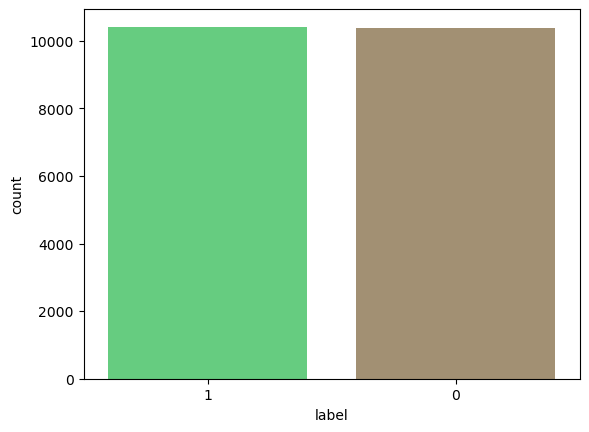

In [144]:

sns.countplot(data=news_dataset,
              x='label',
              order=news_dataset['label'].value_counts().index, palette="terrain");


In [145]:
news_dataset['body']=news_dataset['author']+' '+news_dataset['title']

In [146]:
print(news_dataset['body'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: body, Length: 20800, dtype: object


In [147]:
port_stem =PorterStemmer()

In [148]:
def stemming(body):
  stemmed_body =re.sub('[^a-zA-Z]',' ',body)
  stemmed_body =stemmed_body.lower()
  stemmed_body =stemmed_body.split()
  stemmed_body =[port_stem.stem(word) for word in stemmed_body if not word in stopwords.words('english')]
  stemmed_body =' '.join(stemmed_body)
  return stemmed_body

In [149]:
news_dataset['body']=news_dataset['body'].apply(stemming)

In [150]:
print(news_dataset['body'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: body, Length: 20800, dtype: object


In [151]:
X =news_dataset['body'].values
Y =news_dataset['label'].values

In [152]:
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


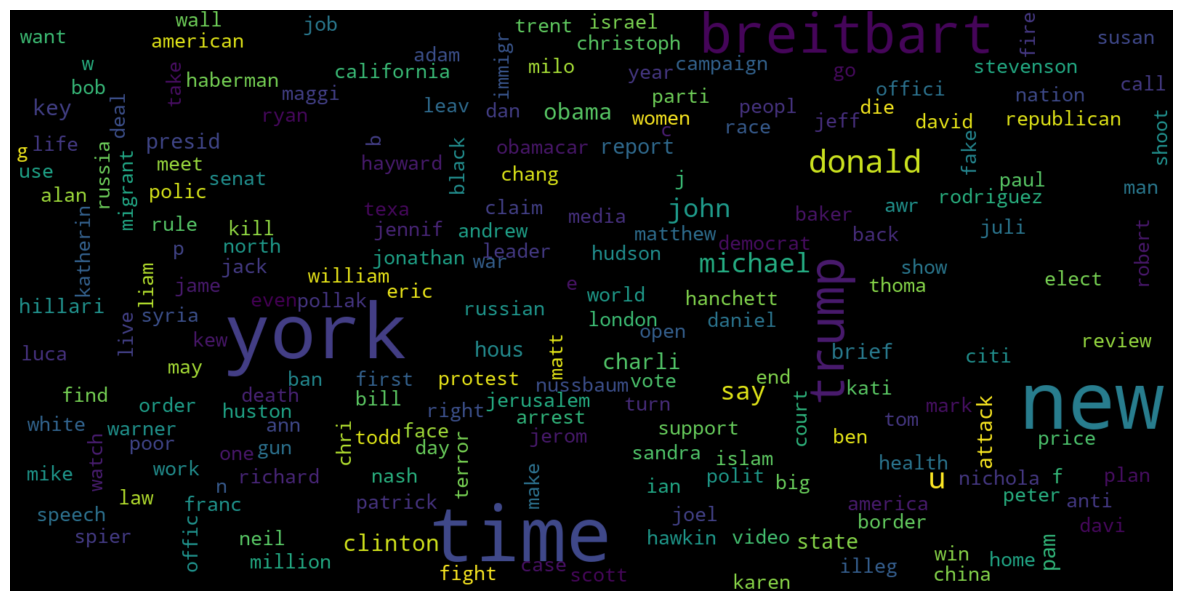

In [153]:
# Real news visualization
consolidated = ' '.join(
    word for word in news_dataset['body'][news_dataset['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

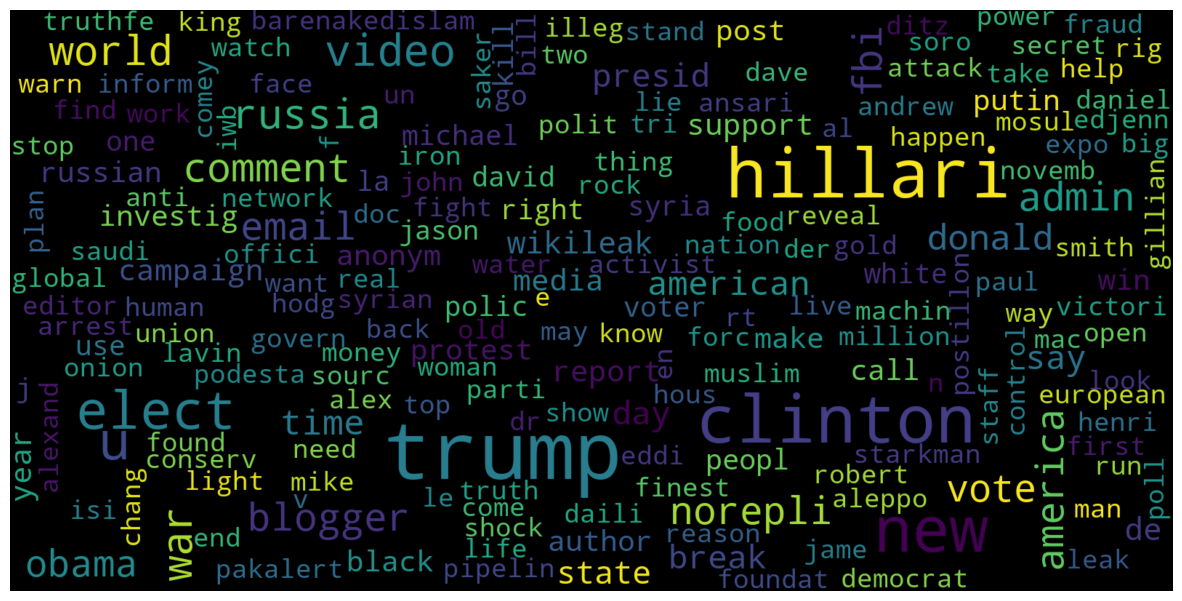

In [154]:
# Fake news visualization
consolidated = ' '.join(
    word for word in news_dataset['body'][news_dataset['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [155]:
# Converting the textual data to numerical data 

vectorizer =TfidfVectorizer()
vectorizer.fit(X) 
X =vectorizer.transform(X)

In [156]:
# X after numerical vectorization
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [157]:
# Splitting the dataset to training and test data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [158]:

#Model Training 
model = LogisticRegression()
#training the model
model.fit(X_train,Y_train)

LogisticRegression()

In [159]:
# Predict training data
Y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train_pred,Y_train)

In [160]:
print('Accuracy score of training data :',training_accuracy)

Accuracy score of training data : 0.9865985576923076


In [161]:
# Predict testing data
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test_pred,Y_test)

In [162]:
print('Accuracy score of test data :',test_accuracy)

Accuracy score of test data : 0.9790865384615385


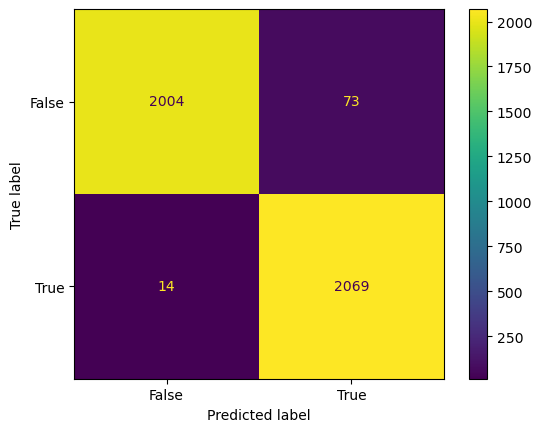

In [163]:
# Confusion matrix of Results from LogisticRegression
cm = metrics.confusion_matrix(Y_test, model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()

In [164]:
#Model Training : Decision Tree Classifier
model = DecisionTreeClassifier()
#training the model
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [165]:
# Predicting training data
Y_train_pred=model.predict(X_train)
# accuracy score of training data
training_accuracy = accuracy_score(Y_train_pred,Y_train)

In [166]:
print('Accuracy score of training data :',training_accuracy)

Accuracy score of training data : 1.0


In [167]:
# Predict testing data
Y_test_pred = model.predict(X_test)
# accuracy score of test data
test_accuracy = accuracy_score(Y_test_pred,Y_test)

In [168]:
print('Accuracy score of test data :',test_accuracy)

Accuracy score of test data : 0.990625


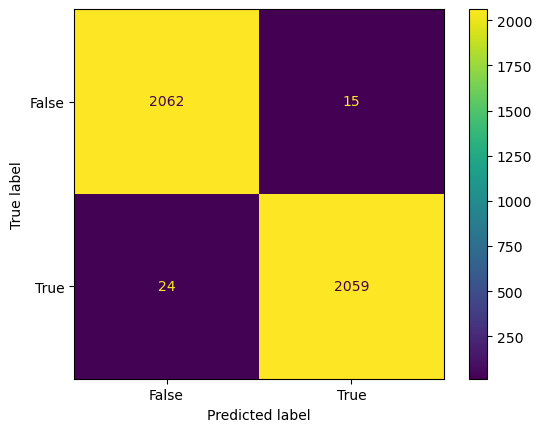

In [169]:
# Confusion matrix of Results from Decision Tree classification
cm = metrics.confusion_matrix(Y_test, model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()

In [170]:

#Making a predictive system
X_new =X_test[0]
prediction = model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print("It's a real news")
else :
  print("It's a fake news")

[1]
It's a fake news


In [171]:
# Cross verifying above prediciton
print(Y_test[0])
if (Y_test[0]==0):
  print("It's a real news")
else :
  print("It's a fake news")

1
It's a fake news
